## Get THINQ v.1.0.0-rc.11 data (Samseg v6.1)
```
mkdir -p /home/paul/cmet/data/20200609-mclaren-1.0.0-rc.11-42-g8d976b0--take4
cd /home/paul/cmet/data/20200609-mclaren-1.0.0-rc.11-42-g8d976b0--take4
aws s3 cp s3://cmet-scratch/maclaren-cmeds/demographics.tsv .
aws s3 cp \
  --recursive \
  --exclude "*" \
  --include "*subject_info.json" \
  --include "*.pdf" \
  s3://cmet-scratch/20200609-mclaren-1.0.0-rc.11-42-g8d976b0--take4/maclaren-cmeds/ .
find . -type d -name 'cache' -exec rm -rf {} \;
```

Get rid of cached `subject_info.json` files:

```
find . -type d -name 'cache' -exec rm -rf {} \;
```

## Get FreeSurfer v6.1 data 
```
mkdir -p /home/paul/cmet/data/20200714-maclaren-fs6/
cd /home/paul/cmet/data/20200714-maclaren-fs6/
aws s3 cp s3://cmet-scratch/maclaren-cmeds/demographics.tsv .
aws s3 cp \
  --recursive \
  --exclude "*" \
  --include "*.stats" \
  s3://cmet-scratch/20200714-maclaren-fs6/ .
```

## Get v7.1 data (both samseg and aseg)
```
mkdir -p /home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/
cd /home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/
aws s3 cp s3://cmet-scratch/maclaren-cmeds/demographics.tsv .
aws s3 cp \
  --recursive \
  --exclude "*" \
  --include "*.stats" \
  s3://cmet-scratch/20201006-maclaren-fs-7.1-samseg-aseg-long/ .
```

### Split data into seperate subdirs

To faciliate recursive processing of *.stats files
```
cd /home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/
mkdir cross
mkdir long
mkdir long-base
mv sub-??_run-?? ./cross/
mv sub-??_base ./long-base
mv sub* ./long/
```

### Rename the long dirs
This is gross
```
cd ./long
for DIR_STEM in `ls -1|sed 's/\..*//'`; do  SUB_NUM=`echo $DIR_STEM|sed 's/sub-//'|sed 's/_run.*//'`; mv ${DIR_STEM}.long.sub-${SUB_NUM}_base ${DIR_STEM}; done
```

# Get THINQ data from container `a30d4ca`

Which corresponds to FreeSurfer git commitID [`c8b6feb`](https://github.com/freesurfer/freesurfer/tree/c8b6feb)

```
mkdir -p /home/paul/cmet/data/20201104-maclaren-rethinq-a30d4ca
cd /home/paul/cmet/data/20201104-maclaren-rethinq-a30d4ca
aws s3 cp s3://cmet-scratch/maclaren-cmeds/demographics.tsv .
aws s3 cp \
  --recursive \
  --exclude "*" \
  --include "*subject_info.json" \
  --include "*.pdf" \
  s3://cmet-scratch/20201104-maclaren-rethinq-a30d4ca/ .
```

Get rid of cached `subject_info.json` files:

```
find . -type d -name 'cache' -exec rm -rf {} \;
```

In [2]:
import json
import os
import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# imports find_json_files(); load_json_file(); load_dataset(); load_fs_dataset()
from cmeds import *
# imports calc_cvs(); session_permute(); monte_carlo_perm_test
from test_retest import *

In [3]:
structs_of_interest = [
    'Left-Lateral-Ventricle',
    'Left-Hippocampus',
    'Left-Amygdala',
    'Left-Caudate',
    'Left-Putamen',
    'Right-Lateral-Ventricle',
    'Right-Hippocampus',
    'Right-Amygdala',
    'Right-Caudate',
    'Right-Putamen'
]

fs61aseg_demofile = '/home/paul/cmet/data/20200714-maclaren-fs6/demographics.tsv'
fs61aseg_datadir = '/home/paul/cmet/data/20200714-maclaren-fs6/'

fs61samseg_demofile = '/home/paul/cmet/data/20200609-mclaren-1.0.0-rc.11-42-g8d976b0--take4/demographics.tsv'
fs61samseg_datadir = '/home/paul/cmet/data/20200609-mclaren-1.0.0-rc.11-42-g8d976b0--take4/'

fs71aseg_demofile = '/home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/demographics.tsv'
fs71aseg_datadir = '/home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/cross'

fs71samseg_demofile = '/home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/demographics.tsv'
fs71aseg_datadir = '/home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/cross'

rethinq_a30d4ca_demofile = '/home/paul/cmet/data/20201006-maclaren-fs-7.1-samseg-aseg-long/demographics.tsv'
rethinq_a30d4ca_datadir = '/home/paul/cmet/data/20201104-maclaren-rethinq-a30d4ca'

## Load data into pandas dataframes

In [15]:
maclaren_fs61aseg_df = load_fs_dataset(fs61aseg_datadir, fs61aseg_demofile, structs_of_interest);
maclaren_fs71aseg_df = load_fs_dataset(fs71aseg_datadir, fs61aseg_demofile, structs_of_interest);
maclaren_fs71samseg_df = load_fssamseg_dataset(fs71aseg_datadir, fs61aseg_demofile, structs_of_interest);

maclaren_rethinq_rc11_df, maclaren_fs61samseg_df_normative = \
  load_dataset(fs61samseg_datadir, fs61samseg_demofile, drop_subjects=[], vol_data_src='volume');

maclaren_rethinq_rc11_samseg6only_df, maclaren_fs61samseg_df_normative = \
  load_dataset(fs61samseg_datadir, fs61samseg_demofile, drop_subjects=[], vol_data_src='samseg_volume');

maclaren_rethinq_a30d4ca_df, maclaren_rethinq_a30d4ca_normative_df = \
  load_dataset(rethinq_a30d4ca_datadir, rethinq_a30d4ca_demofile, drop_subjects=[], vol_data_src='volume');

maclaren_rethinq_a30d4ca_samseg7only_df, maclaren_rethinq_a30d4ca_normative_df = \
  load_dataset(rethinq_a30d4ca_datadir, rethinq_a30d4ca_demofile, drop_subjects=[], vol_data_src='samseg_volume');

Dropping the following subjects []
Dropping the following subjects []
Dropping the following subjects []
Ignoring Subject (did it error out?) sub-01_run-39
Ignoring Subject (did it error out?) sub-01_run-02
Ignoring Subject (did it error out?) sub-01_run-09
Ignoring Subject (did it error out?) sub-01_run-08
Ignoring Subject (did it error out?) sub-01_run-24
Ignoring Subject (did it error out?) sub-01_run-33
Ignoring Subject (did it error out?) sub-01_run-13
Ignoring Subject (did it error out?) sub-01_run-16
Ignoring Subject (did it error out?) sub-01_run-14
Ignoring Subject (did it error out?) sub-01_run-32
Ignoring Subject (did it error out?) sub-01_run-01
Ignoring Subject (did it error out?) sub-01_run-36
Ignoring Subject (did it error out?) sub-01_run-06
Ignoring Subject (did it error out?) sub-01_run-26
Ignoring Subject (did it error out?) sub-01_run-27
Ignoring Subject (did it error out?) sub-01_run-40
Ignoring Subject (did it error out?) sub-01_run-03
Ignoring Subject (did it err

Ignoring Subject (did it error out?) sub-01_run-39
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-02
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-09
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-08
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-24
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-13
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-28
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-16
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-14
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub-01_run-29
Ignoring Subject (did it error out?) rethinq
Ignoring Subject (did it error out?) sub

In [18]:
# Add some lateral regions together so we can directly compare to table 1 in MacLaren et al.
# https://www.nature.com/articles/sdata201437/tables/2
regions = [             
            [ ['Left-Hippocampus', 'Right-Hippocampus'],'Hippocampus' ],
            [ ['Left-Lateral-Ventricle', 'Right-Lateral-Ventricle'],'Lateral-Ventricles' ],
            [ ['Left-Amygdala', 'Right-Amygdala',],'Amygdala' ],
            [ ['Left-Putamen', 'Right-Putamen'],'Putamen' ],
            [ ['Left-Caudate', 'Right-Caudate'],'Caudate' ],
          ]

maclaren_fs61aseg_df = add_regions(maclaren_fs61aseg_df,regions)
maclaren_fs71aseg_df = add_regions(maclaren_fs71aseg_df,regions)
maclaren_fs71samseg_df = add_regions(maclaren_fs71samseg_df,regions)
maclaren_rethinq_rc11_df = add_regions(maclaren_rethinq_rc11_df,regions)
maclaren_rethinq_rc11_samseg6only_df = add_regions(maclaren_rethinq_rc11_samseg6only_df,regions)
maclaren_rethinq_a30d4ca_df = add_regions(maclaren_rethinq_a30d4ca_df,regions)
maclaren_rethinq_a30d4ca_samseg7only_df = add_regions(maclaren_rethinq_a30d4ca_samseg7only_df,regions)

In [19]:
# Setup for permutation tests

# Since samseg 6 has some issues with sub1, remove from all analyses
session_list= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
subject_list= [2,3]

# The column name that holds session info in the demographics.tsv
session_col='session'
# The column name that holds subject info in the demographics.tsv
subject_col='subject_num'

# To match with the rows of table 1 in https://www.nature.com/articles/sdata201437/tables/2
structs_of_interest = ['Hippocampus', 'Lateral-Ventricles', 'Amygdala', 'Putamen', 'Caudate']

In [111]:
# Run the permutation tests, this will take a while for large n
n = 10000

maclaren_covs_fs61aseg_df = monte_carlo_perm_test( \
  maclaren_fs61aseg_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

maclaren_covs_fs71aseg_df = monte_carlo_perm_test( \
  maclaren_fs71aseg_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

maclaren_covs_fs71samseg_df = monte_carlo_perm_test( \
  maclaren_fs71samseg_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

maclaren_covs_rethinq_rc11_df = monte_carlo_perm_test( \
  maclaren_rethinq_rc11_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

maclaren_covs_rethinq_rc11_samseg6only_df = monte_carlo_perm_test( \
  maclaren_rethinq_rc11_samseg6only_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

maclaren_covs_rethinq_a30d4ca_df = monte_carlo_perm_test( \
  maclaren_rethinq_a30d4ca_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

maclaren_covs_rethinq_a30d4ca_samseg7only_df = monte_carlo_perm_test( \
  maclaren_rethinq_a30d4ca_samseg7only_df, subject_list, session_list, subject_col, session_col, \
  structs_of_interest, n_itrs=n, method='gluer')

These tables are comparable to [Table 1 in MacLaren et al](https://www.nature.com/articles/sdata201437/tables/2)

In [121]:
maclaren_covs_fs61aseg_df.T['p-vals']

Hippocampus             0.2163
Lateral-Ventricles           0
Amygdala                0.7949
Putamen                 0.1608
Caudate                 0.2848
version               fs61aseg
Name: p-vals, dtype: object

In [113]:
maclaren_covs_fs71aseg_df.T

,mean-vol,total-cov,session-cov,abs-diff-cov,p-vals
Hippocampus,8590.83500,1.670197,1.749787,0.079589,0.5790
Lateral-Ventricles,13670.43500,1.910059,0.728072,1.181987,0.0000
Amygdala,3510.17750,3.013569,3.255942,0.242373,0.3178
Putamen,9883.45250,1.429833,1.496864,0.067031,0.5553
Caudate,6867.28375,1.996576,1.644559,0.352017,0.0235


In [114]:
maclaren_covs_fs71samseg_df.T

,mean-vol,total-cov,session-cov,abs-diff-cov,p-vals
Hippocampus,10770.732396,1.389530,1.069301,0.320229,0.0026
Lateral-Ventricles,23208.657477,1.672704,1.406157,0.266547,0.0280
Amygdala,3779.890494,1.556568,1.675307,0.118739,0.3131
Putamen,13517.240480,8.808640,9.338202,0.529562,0.4576
Caudate,8726.351490,2.079050,2.004842,0.074207,0.7032


In [115]:
maclaren_covs_rethinq_rc11_df.T

,mean-vol,total-cov,session-cov,abs-diff-cov,p-vals
Hippocampus,8660.34375,0.732712,0.754715,0.022003,0.6942
Lateral-Ventricles,15643.99250,1.428306,0.950413,0.477893,0.0000
Amygdala,3290.56625,1.213812,1.216737,0.002925,0.9772
Putamen,11229.76125,1.103016,0.979911,0.123105,0.1624
Caudate,7051.12625,0.928835,0.789903,0.138931,0.0499


In [116]:
maclaren_covs_rethinq_rc11_samseg6only_df.T

,mean-vol,total-cov,session-cov,abs-diff-cov,p-vals
Hippocampus,9355.6250,0.780972,0.827046,0.046074,0.4611
Lateral-Ventricles,17344.8375,1.450123,1.177534,0.272589,0.0151
Amygdala,3414.0125,1.155101,1.156447,0.001346,0.9878
Putamen,11434.6000,1.068060,1.027789,0.040271,0.6301
Caudate,7083.5875,1.106091,0.942654,0.163436,0.0575


In [117]:
maclaren_covs_rethinq_a30d4ca_df.T

,mean-vol,total-cov,session-cov,abs-diff-cov,p-vals
Hippocampus,8627.19125,0.754608,0.750160,0.004448,0.9374
Lateral-Ventricles,15596.68625,1.434468,0.927965,0.506504,0.0000
Amygdala,3293.11375,1.161294,1.142108,0.019186,0.8343
Putamen,11224.87125,1.152517,1.036997,0.115520,0.2425
Caudate,7009.92750,1.063610,0.879061,0.184549,0.0238


In [118]:
maclaren_covs_rethinq_a30d4ca_samseg7only_df.T

,mean-vol,total-cov,session-cov,abs-diff-cov,p-vals
Hippocampus,9312.0000,0.807860,0.846088,0.038227,0.5533
Lateral-Ventricles,17266.9125,1.454232,1.142637,0.311595,0.0062
Amygdala,3415.9750,1.145045,1.147874,0.002828,0.9752
Putamen,11579.1375,1.005290,0.912069,0.093222,0.2457
Caudate,7023.5875,1.264741,1.052177,0.212564,0.0247


In [119]:
# add version info to dataframes
n_datapoints = len(maclaren_covs_fs61aseg_df.index)

maclaren_covs_fs61aseg_df['version'] = ['fs61aseg'] * n_datapoints
maclaren_covs_fs71aseg_df['version'] = ['fs71aseg'] * n_datapoints
maclaren_covs_fs71samseg_df['version'] = ['fs71samseg'] * n_datapoints 
maclaren_covs_rethinq_rc11_df['version'] = ['rethinq_rc11'] * n_datapoints
maclaren_covs_rethinq_rc11_samseg6only_df['version'] = ['rethinq_rc11_samseg6only'] * n_datapoints 
maclaren_covs_rethinq_a30d4ca_df['version'] = ['rethinq_a30d4ca'] * n_datapoints
maclaren_covs_rethinq_a30d4ca_samseg7only_df['version'] = ['rethinq_a30d4ca_samseg7only'] * n_datapoints

# and concatenate
maclaren_covs_all_df = pd.concat([maclaren_covs_fs61aseg_df,maclaren_covs_fs71aseg_df,maclaren_covs_fs71samseg_df,maclaren_covs_rethinq_rc11_df,maclaren_covs_rethinq_rc11_samseg6only_df,maclaren_covs_rethinq_a30d4ca_df,maclaren_covs_rethinq_a30d4ca_samseg7only_df])

# sand save as csv
maclaren_covs_all_df.to_csv(r'maclaren-covs.csv')

In [120]:
maclaren_covs_all_df

,Hippocampus,Lateral-Ventricles,Amygdala,Putamen,Caudate,version
mean-vol,8522.698750,13563.502500,3424.332500,9855.987500,6863.805000,fs61aseg
total-cov,2.053487,2.081874,3.230995,1.895118,1.706345,fs61aseg
session-cov,2.258124,0.902939,3.159073,2.135972,1.557038,fs61aseg
abs-diff-cov,0.204637,1.178935,0.071922,0.240854,0.149307,fs61aseg
p-vals,0.216300,0.000000,0.794900,0.160800,0.284800,fs61aseg
mean-vol,8590.835000,13670.435000,3510.177500,9883.452500,6867.283750,fs71aseg
total-cov,1.670197,1.910059,3.013569,1.429833,1.996576,fs71aseg
session-cov,1.749787,0.728072,3.255942,1.496864,1.644559,fs71aseg
abs-diff-cov,0.079589,1.181987,0.242373,0.067031,0.352017,fs71aseg
p-vals,0.579000,0.000000,0.317800,0.555300,0.023500,fs71aseg


In [122]:
maclaren_fs61aseg_df['Lateral-Ventricles']

sub-01_run-01    9098.4
sub-01_run-02    9130.7
sub-01_run-03    9193.2
sub-01_run-04    9363.3
sub-01_run-05    9299.9
                  ...  
sub-03_run-36    9121.2
sub-03_run-37    9003.2
sub-03_run-38    8918.9
sub-03_run-39    9028.8
sub-03_run-40    9132.1
Name: Lateral-Ventricles, Length: 120, dtype: float64

<BarContainer object of 120 artists>

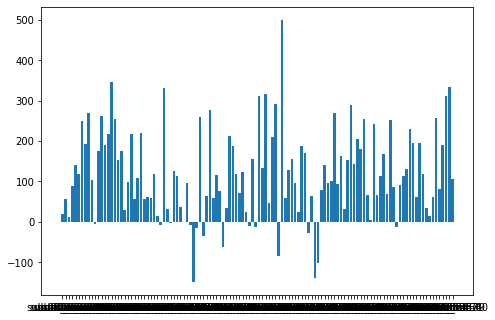

In [138]:
#pd.set_option("display.max_rows", 120)
#[maclaren_fs71aseg_df['Left-Lateral-Ventricle'] - maclaren_fs61aseg_df['Left-Lateral-Ventricle']]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(maclaren_fs71samseg_df['Left-Lateral-Ventricle'].index,maclaren_fs71aseg_df['Left-Lateral-Ventricle'] - maclaren_fs61aseg_df['Left-Lateral-Ventricle'])

<BarContainer object of 120 artists>

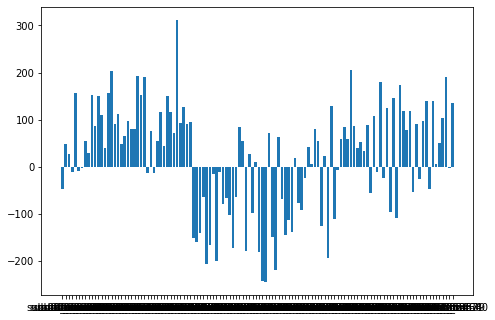

In [139]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(maclaren_fs71samseg_df['Right-Lateral-Ventricle'].index,maclaren_fs71aseg_df['Right-Lateral-Ventricle'] - maclaren_fs61aseg_df['Right-Lateral-Ventricle'])